In [1]:
from pymongo import MongoClient
client = MongoClient("mongodb://127.0.0.1:27017")
db = client['World']
collection = db['countries']
import pandas as pd
data = pd.read_csv('countries-table.csv')
data_to_insert = data.to_dict(orient='records')
collection.insert_many(data_to_insert)

InsertManyResult([ObjectId('655f79c4a9206ba6b394348f'), ObjectId('655f79c4a9206ba6b3943490'), ObjectId('655f79c4a9206ba6b3943491'), ObjectId('655f79c4a9206ba6b3943492'), ObjectId('655f79c4a9206ba6b3943493'), ObjectId('655f79c4a9206ba6b3943494'), ObjectId('655f79c4a9206ba6b3943495'), ObjectId('655f79c4a9206ba6b3943496'), ObjectId('655f79c4a9206ba6b3943497'), ObjectId('655f79c4a9206ba6b3943498'), ObjectId('655f79c4a9206ba6b3943499'), ObjectId('655f79c4a9206ba6b394349a'), ObjectId('655f79c4a9206ba6b394349b'), ObjectId('655f79c4a9206ba6b394349c'), ObjectId('655f79c4a9206ba6b394349d'), ObjectId('655f79c4a9206ba6b394349e'), ObjectId('655f79c4a9206ba6b394349f'), ObjectId('655f79c4a9206ba6b39434a0'), ObjectId('655f79c4a9206ba6b39434a1'), ObjectId('655f79c4a9206ba6b39434a2'), ObjectId('655f79c4a9206ba6b39434a3'), ObjectId('655f79c4a9206ba6b39434a4'), ObjectId('655f79c4a9206ba6b39434a5'), ObjectId('655f79c4a9206ba6b39434a6'), ObjectId('655f79c4a9206ba6b39434a7'), ObjectId('655f79c4a9206ba6b39434

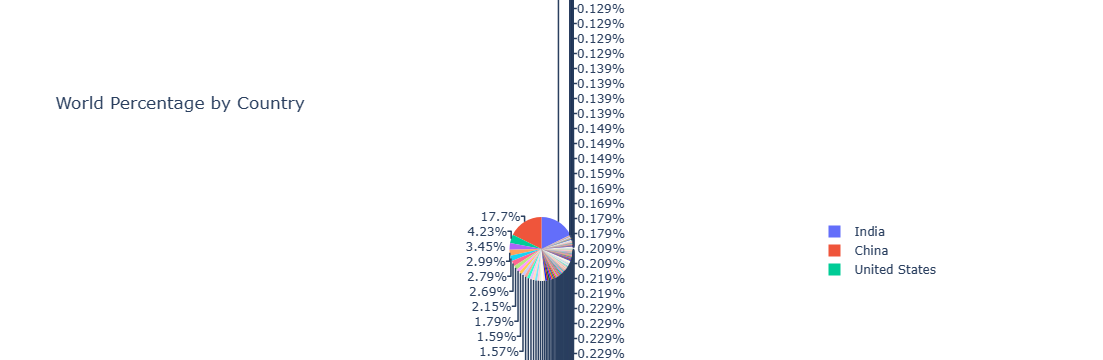

In [86]:
import plotly.express as px
data_from_mongo = list(collection.find({}, {'country': 1, 'worldPercentage': 1})) 
df = pd.DataFrame(data_from_mongo)
fig = px.pie(df, names='country', values='worldPercentage', title='World Percentage by Country')
fig.show()


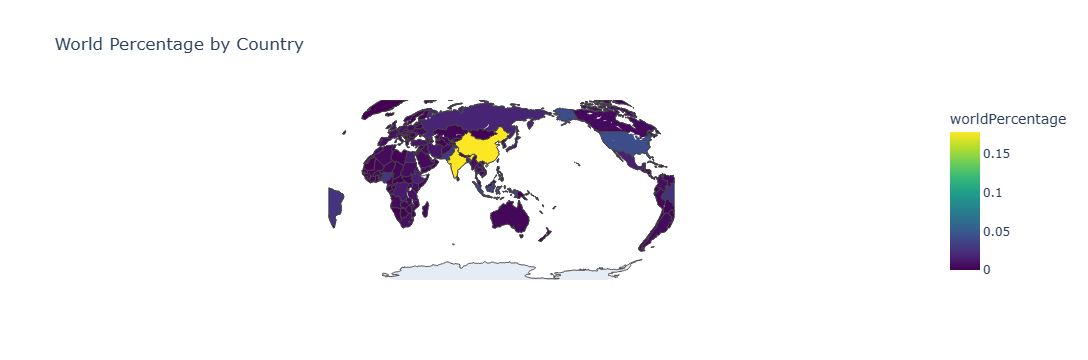

In [14]:
import plotly.express as px
data_from_mongo = list(collection.find({}, {'country': 1, 'worldPercentage': 1, '_id': 0}))
df = pd.DataFrame(data_from_mongo)
fig = px.choropleth(df, locations='country', locationmode='country names', color='worldPercentage',
                    hover_name='country', title='World Percentage by Country',
                    color_continuous_scale='Viridis')
fig.update_layout(geo=dict(showframe=False, projection_type='natural earth'))

fig.show()

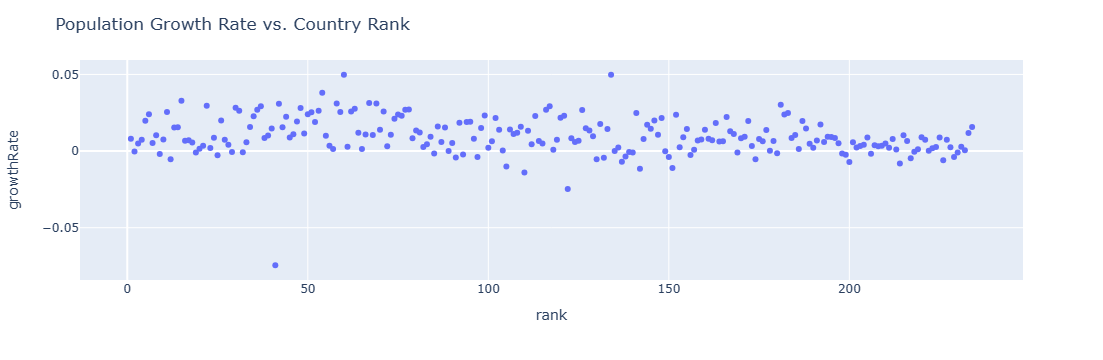

In [26]:
fig = px.scatter(data, x='rank', y='growthRate', hover_data=['country'])
fig.update_layout(title='Population Growth Rate vs. Country Rank')
fig.show()

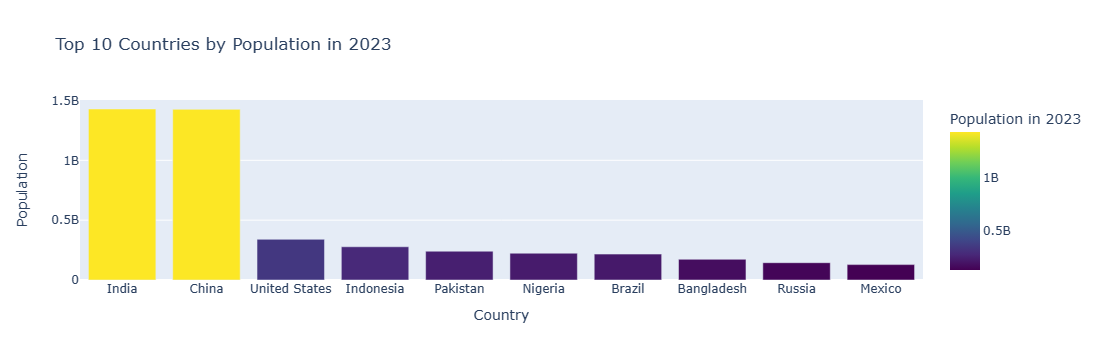

In [35]:
top_10_populated_countries = data.sort_values('pop2023', ascending=False).head(10)

fig = px.bar(top_10_populated_countries, x='country', y='pop2023',
             title='Top 10 Countries by Population in 2023',
             labels={'pop2023': 'Population in 2023', 'country': 'Country'},
             color='pop2023', color_continuous_scale='Viridis')
fig.update_xaxes(title='Country')
fig.update_yaxes(title='Population')
fig.show()

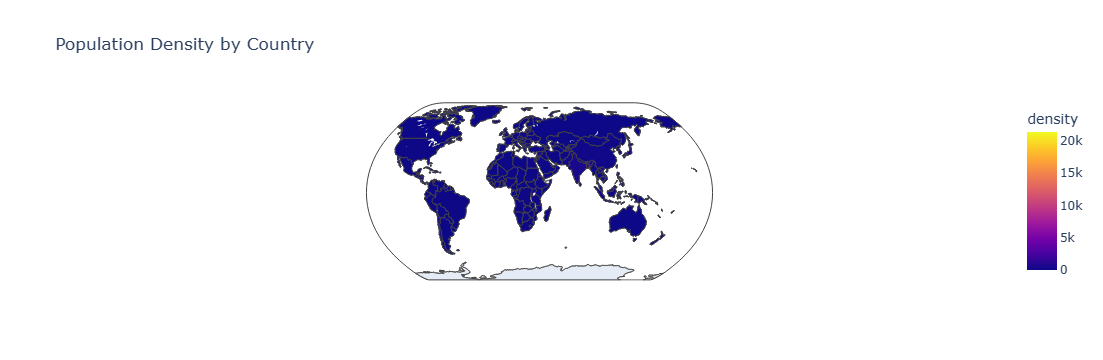

In [58]:
fig = px.choropleth(data, 
                    locations='cca3', 
                    color='density', 
                    hover_name='country', 
                    hover_data=['density'],
                    projection='natural earth',
                    title='Population Density by Country')
fig.update_geos(showcountries=True, countrycolor="Gray")
fig.show()

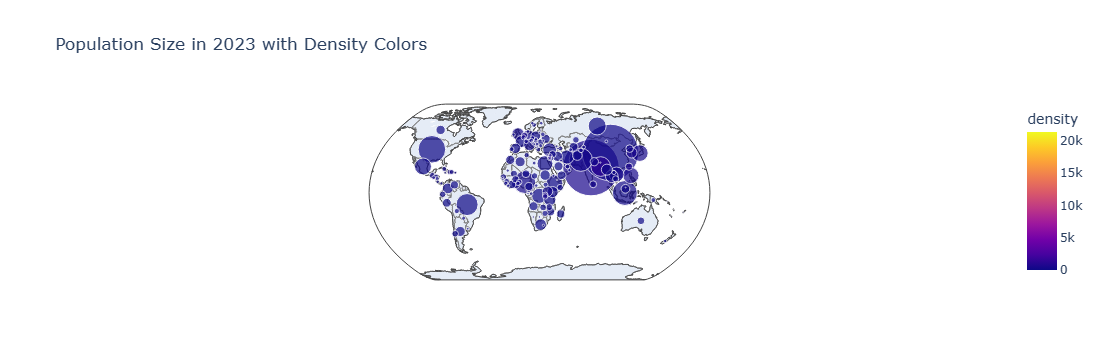

In [60]:
fig = px.scatter_geo(data, 
                     locations='cca3', 
                     size='pop2023',
                     color='density',
                     hover_name='country', 
                     projection='natural earth',
                     title='Population Size in 2023 with Density Colors',
                     size_max=40)
fig.update_geos(showcountries=True, countrycolor="Gray")
fig.show()

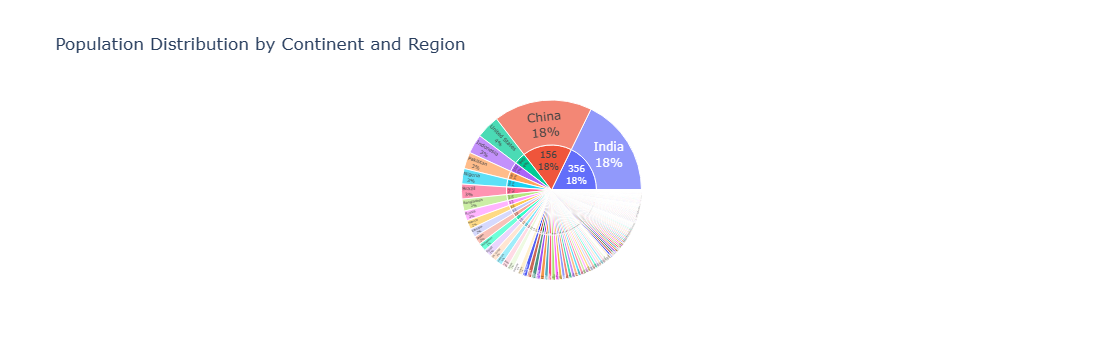

In [39]:
import plotly.express as px
fig = px.sunburst(data, path=['place', 'country'], values='pop2023',
                  title='Population Distribution by Continent and Region')
fig.update_traces(textinfo='label+percent entry')
fig.show()

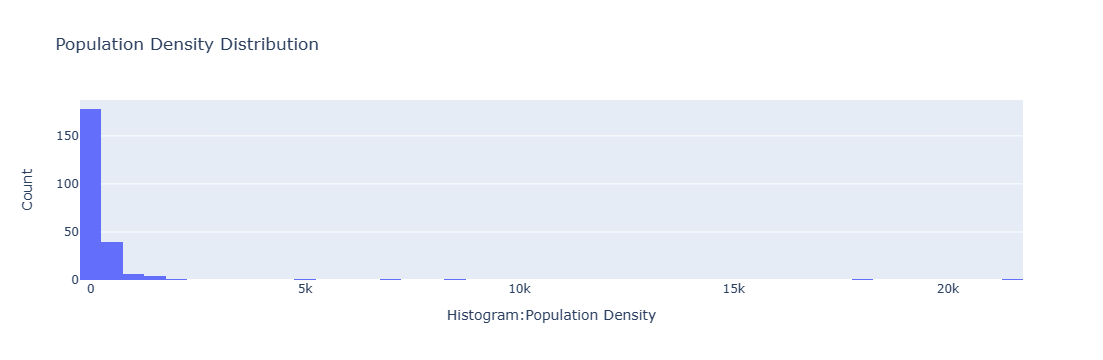

In [52]:
fig = px.histogram(data, x='density',
                   title='Population Density Distribution',
                   labels={'density': 'Population Density'})
fig.update_xaxes(title='Histogram:Population Density')
fig.update_yaxes(title='Count')
fig.show()

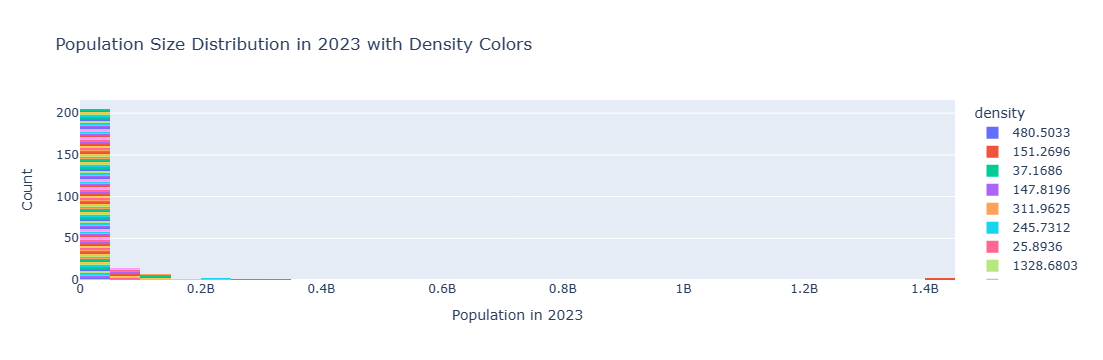

In [54]:
fig = px.histogram(data, x='pop2023', color='density',
                   title='Population Size Distribution in 2023 with Density Colors',
                   labels={'pop2023': 'Population in 2023'})
fig.update_xaxes(title='Population in 2023')
fig.update_yaxes(title='Count')
fig.show()

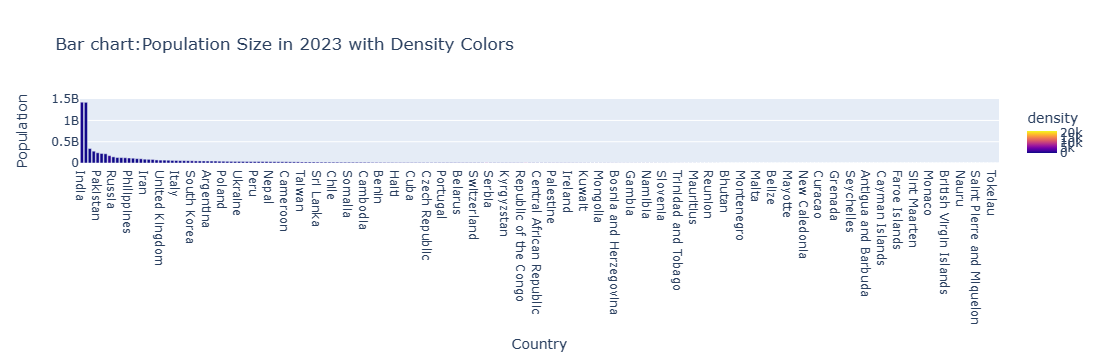

In [55]:
fig = px.bar(data, x='country', y='pop2023', color='density',
             title='Bar chart:Population Size in 2023 with Density Colors',
             labels={'pop2023': 'Population in 2023', 'country': 'Country'},
             hover_data=['density'])
fig.update_xaxes(title='Country')
fig.update_yaxes(title='Population')
fig.show()

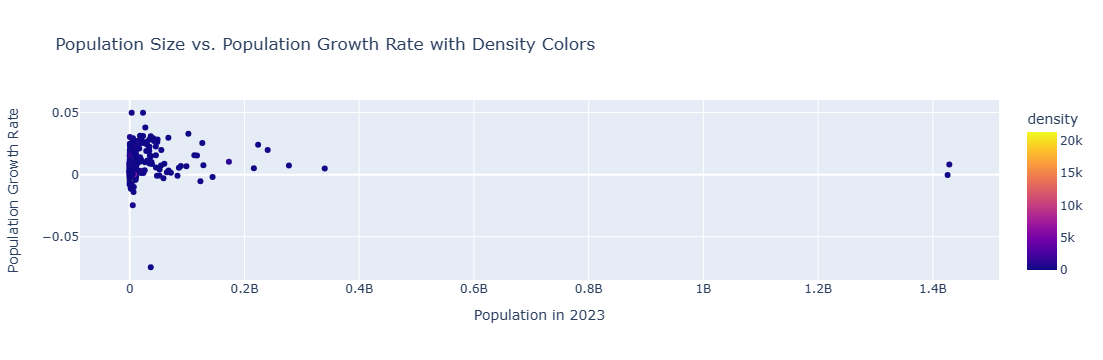

In [56]:
fig = px.scatter(data, x='pop2023', y='growthRate', color='density',
                 title='Population Size vs. Population Growth Rate with Density Colors',
                 labels={'pop2023': 'Population in 2023', 'growthRate': 'Population Growth Rate'},
                 hover_data=['country'])
fig.update_xaxes(title='Population in 2023')
fig.update_yaxes(title='Population Growth Rate')
fig.show()

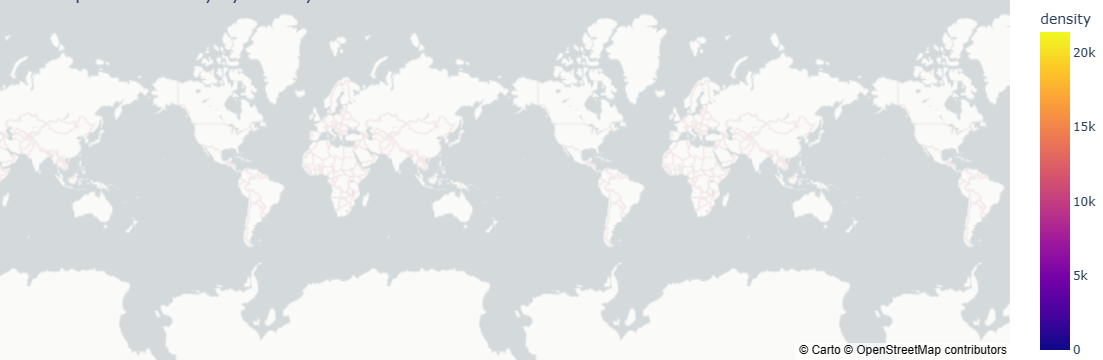

In [63]:
fig = px.density_mapbox(data, lat='country', lon='country', z='density',
                        hover_name='country', radius=30,
                        center=dict(lat=0, lon=0),
                        title='Population Density by Country',
                        mapbox_style="carto-positron", zoom=1)
fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))
fig.show()

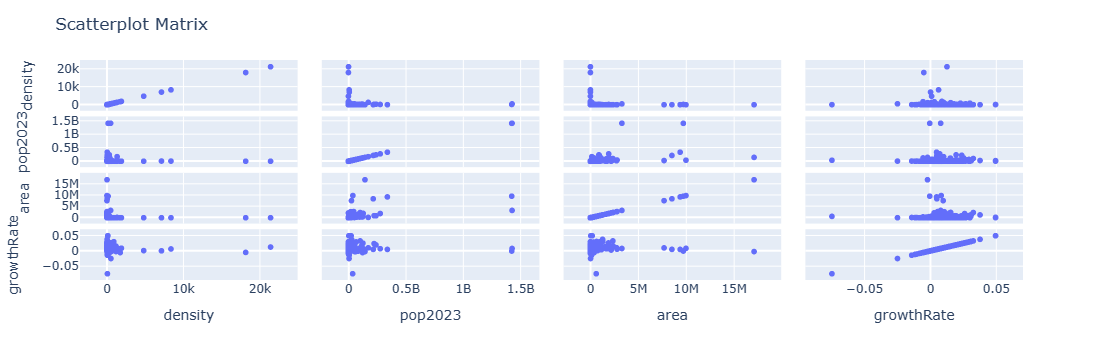

In [79]:
vars_to_plot = ['density', 'pop2023', 'area', 'growthRate']
color_column = 'worldPercentage'
fig = px.scatter_matrix(data[vars_to_plot])
fig.update_layout(title='Scatterplot Matrix')
fig.show()

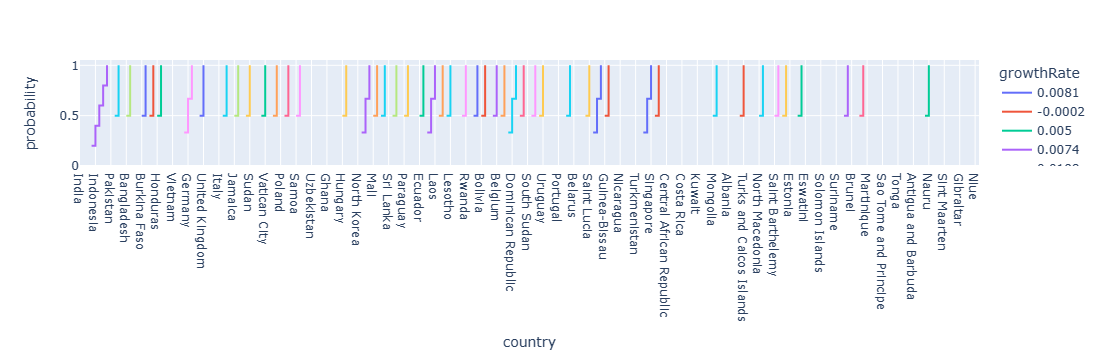

In [80]:
fig = px.ecdf(df, x="country", color="growthRate")
fig.show()